In [ ]:
import librosa
!pip install pydub
from pydub import AudioSegment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%cd /content

/content


In [ ]:
from os.path import dirname, join as pjoin
from scipy.io import wavfile
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd

Read .mp3 and convert to .wav then read samplerate and x_t from .wav

In [ ]:
def read(fname):
  samplerate, x_t = wavfile.read(fname+'.wav')
  length = x_t.shape[0] / samplerate
  time = np.linspace(0., length, x_t.shape[0])
  plt.plot(time, x_t[:, 0])
  plt.title(fname)
  plt.xlabel("Time [s]")
  plt.ylabel("Amplitude")
  plt.show()
  #ipd.Audio(x_t, rate=samplerate, autoplay=True)
  return time, x_t, samplerate

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from scipy import signal,fftpack

Use fft to convert to freq **domain**

In [ ]:
def DFT(fname):
  time, x_t, samplerate = read(fname)
  #x_freq = fftpack.fftfreq(len(time),x_t.shape[0]/samplerate)
  x_freq = samplerate/x_t.shape[0]*np.arange(x_t.shape[0])
  x_spec = fftpack.fft(x_t)
  plt.figure(figsize = (8, 6))
  plt.plot(x_freq[:x_t.shape[0]//2], np.log10((np.abs(x_spec[:x_t.shape[0]//2,0]))))
  plt.xlabel('Freq (Hz)')
  plt.ylabel('log10|X(freq)|')
  plt.title(fname)
  plt.show()

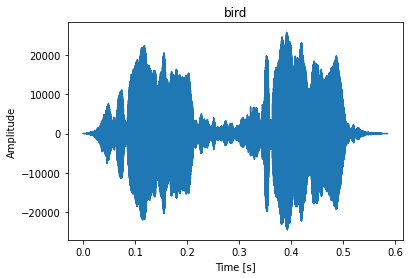

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


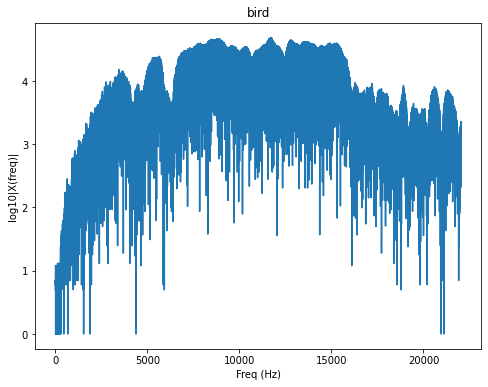

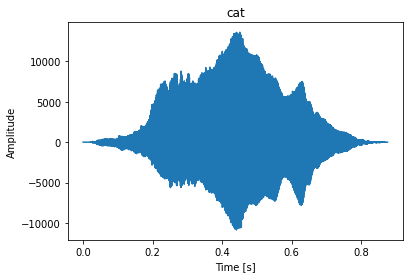

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


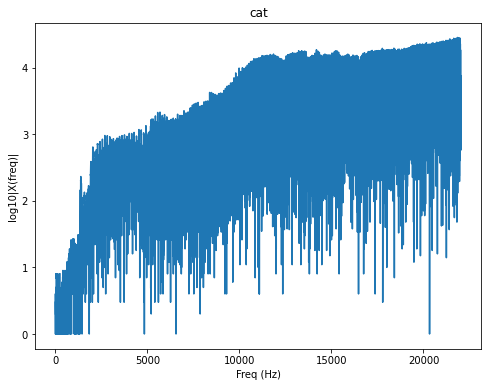

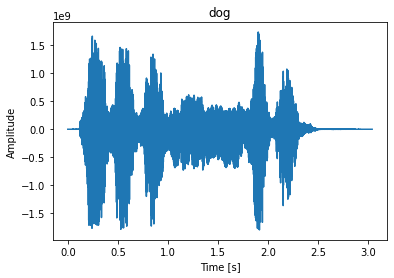

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


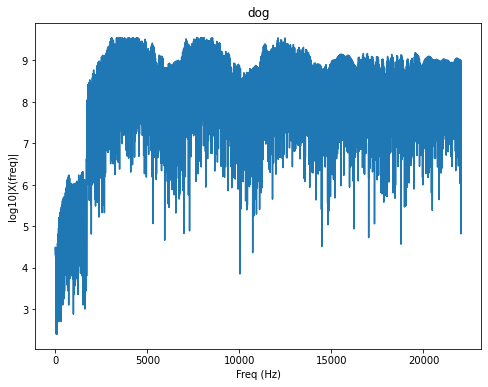

In [ ]:
DFT("bird")
DFT("cat")
DFT("dog")

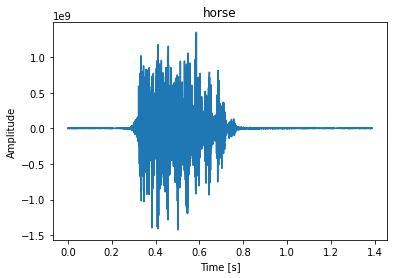